# First  Prepare The data

# 1.1 Import Data

In [2]:
!pip install numpy

In [166]:
!pip install h2o

                                              0.0/265.3 MB ? eta -:--:--
                                            0.0/265.3 MB 660.6 kB/s eta 0:06:42
                                            0.1/265.3 MB 656.4 kB/s eta 0:06:45
                                            0.1/265.3 MB 751.6 kB/s eta 0:05:53
                                            0.1/265.3 MB 774.0 kB/s eta 0:05:43
                                            0.2/265.3 MB 908.0 kB/s eta 0:04:52
                                            0.2/265.3 MB 811.5 kB/s eta 0:05:27
                                            0.3/265.3 MB 874.6 kB/s eta 0:05:04
                                              0.4/265.3 MB 1.0 MB/s eta 0:04:15
                                              0.4/265.3 MB 1.0 MB/s eta 0:04:23
                                              0.5/265.3 MB 1.1 MB/s eta 0:04:03
                                              0.5/265.3 MB 1.1 MB/s eta 0:04:03
                                              0

In [193]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
import pickle

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from h2o.automl import H2OAutoML

import warnings
warnings.filterwarnings("ignore")

In [180]:
def wrangle(filebath):
    # read csv file
    df = pd.read_csv(filebath)
    # split datetime 
    df["datetime"] = pd.to_datetime(df["datetime"])
    df['year']= df['datetime'].dt.year
    df["month"]= df["datetime"].dt.month
    df["day"]= df["datetime"].dt.day
    df["hour"]= df["datetime"].dt.hour
    #drop datetime
    df.drop(columns=["datetime"],inplace=True)
    # Mask for delete outlires casual 125 windspeed 30 regeistred 500
    df = df[df["casual"] < 125]
    df = df[df["windspeed"] < 30 ]
    df = df[df["registered"] < 500]
    return df

In [106]:
df = wrangle("C:\\Users\\omar1\\bike-sharing-demand\\train.csv")
df.tail(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10863,4,0,1,1,12.30,15.910,65,6.0032,1,14,15,2012,12,19,1
10864,4,0,1,1,11.48,15.150,65,6.0032,1,2,3,2012,12,19,2
10865,4,0,1,1,10.66,13.635,75,8.9981,0,5,5,2012,12,19,3
10866,4,0,1,1,9.84,12.120,75,8.9981,1,6,7,2012,12,19,4
10867,4,0,1,1,10.66,14.395,75,6.0032,2,29,31,2012,12,19,5
10868,4,0,1,1,9.84,12.880,75,6.0032,3,109,112,2012,12,19,6
10869,4,0,1,1,10.66,13.635,75,8.9981,3,360,363,2012,12,19,7
10871,4,0,1,1,11.48,14.395,75,7.0015,8,309,317,2012,12,19,9
10872,4,0,1,1,13.12,16.665,70,7.0015,17,147,164,2012,12,19,10
10873,4,0,1,1,16.40,20.455,54,15.0013,31,169,200,2012,12,19,11


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9426 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      9426 non-null   int64  
 1   holiday     9426 non-null   int64  
 2   workingday  9426 non-null   int64  
 3   weather     9426 non-null   int64  
 4   temp        9426 non-null   float64
 5   atemp       9426 non-null   float64
 6   humidity    9426 non-null   int64  
 7   windspeed   9426 non-null   float64
 8   casual      9426 non-null   int64  
 9   registered  9426 non-null   int64  
 10  count       9426 non-null   int64  
 11  year        9426 non-null   int64  
 12  month       9426 non-null   int64  
 13  day         9426 non-null   int64  
 14  hour        9426 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [29]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


In [31]:
df.isnull()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [47]:
df.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
year            2
month          12
day            19
hour           24
dtype: int64

# 1.2 Explore Data

<Axes: title={'center': 'season pie chart'}, ylabel='season'>

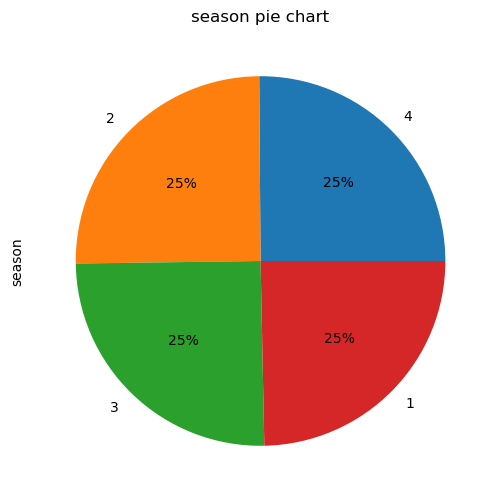

In [61]:
df["season"].value_counts().plot(
    kind = "pie",
    figsize=(11, 6),
    autopct='%1.f%%',
    title= "season pie chart"
)

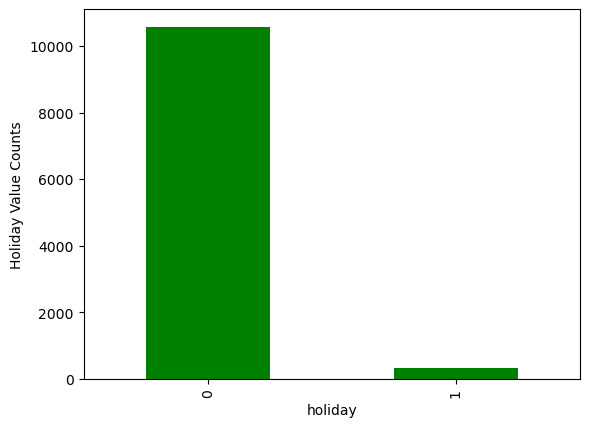

In [71]:
df["holiday"].value_counts().plot(
    kind="bar",
    color = "green",
    xlabel = "holiday",
    ylabel = "Holiday Value Counts" 
);

<Axes: >

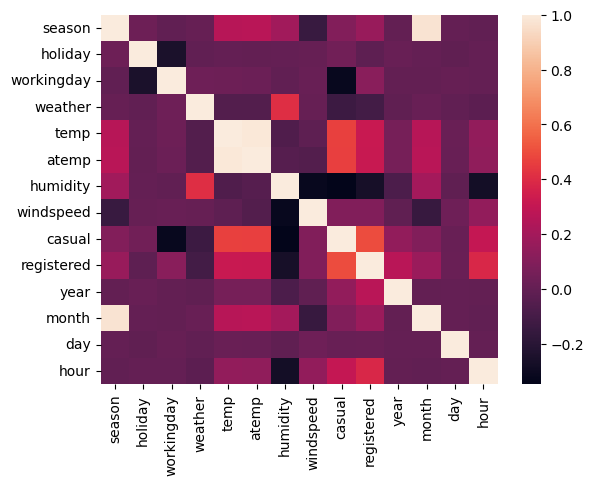

In [75]:
corr = df.drop(columns="count").corr()
sns.heatmap(corr)

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

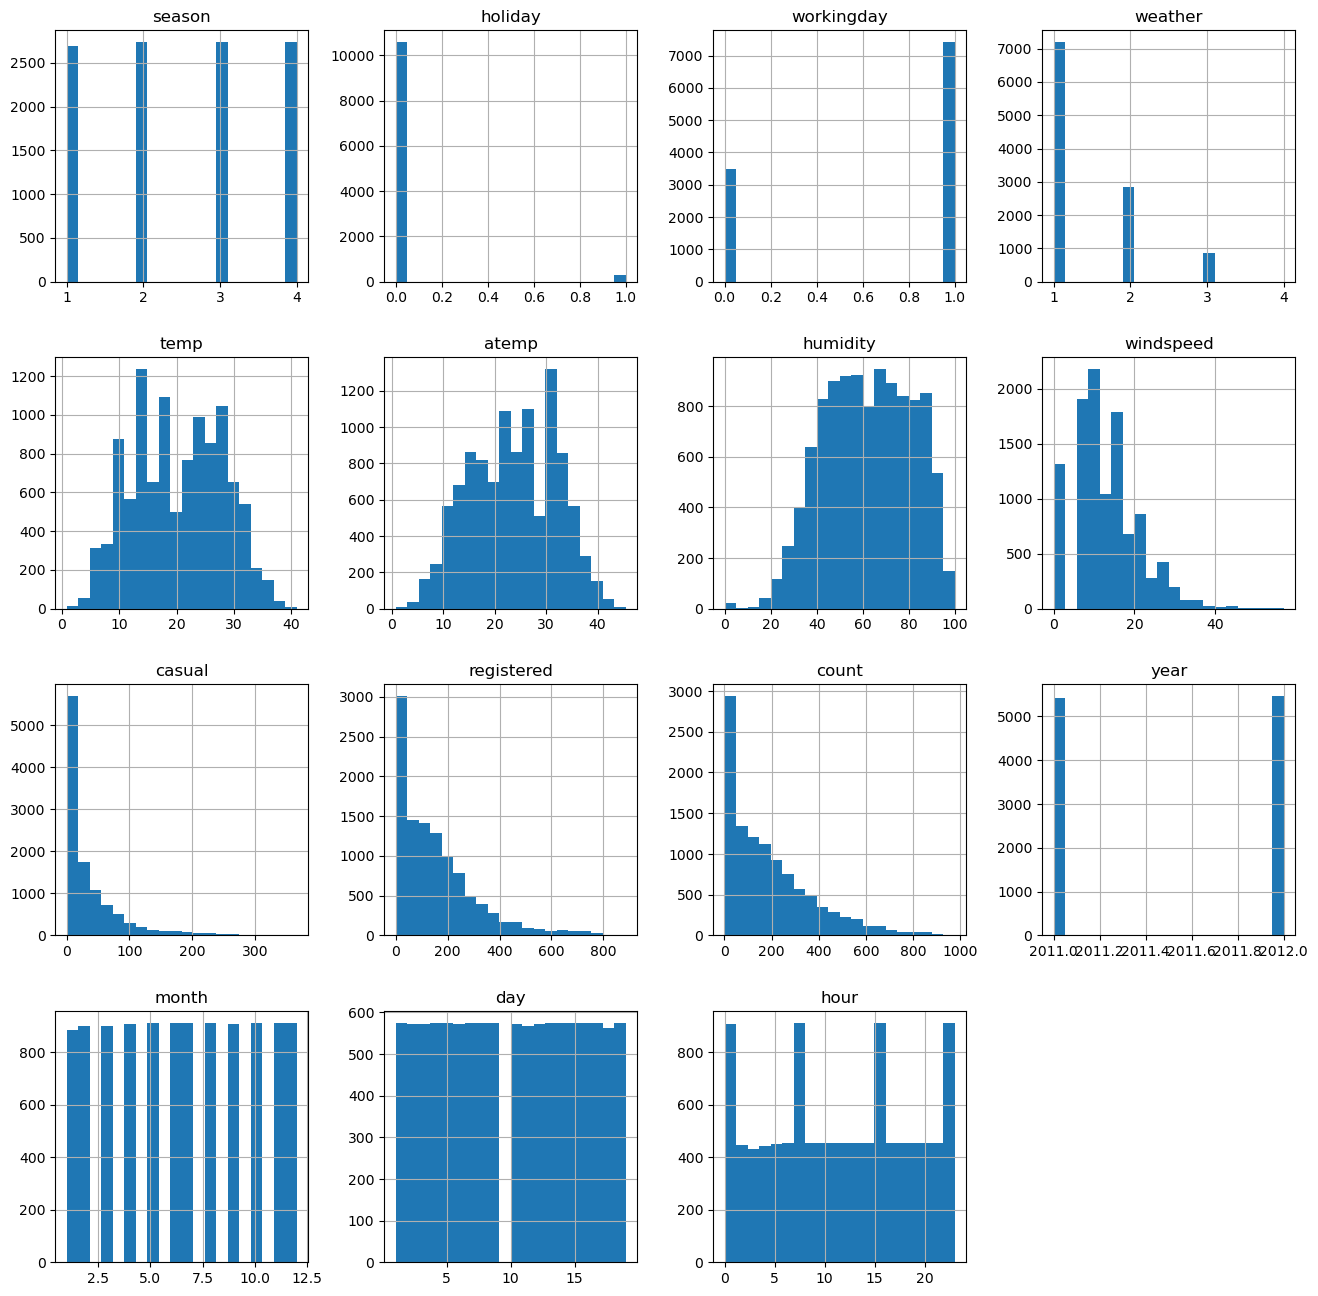

In [85]:
#df.hist(layout=(4.4),bins=20,figsize=(16,16))
df.hist(layout=(4, 4), bins=20, figsize=(16, 16))


season           Axes(0.125,0.747241;0.227941x0.132759)
holiday       Axes(0.398529,0.747241;0.227941x0.132759)
workingday    Axes(0.672059,0.747241;0.227941x0.132759)
weather          Axes(0.125,0.587931;0.227941x0.132759)
temp          Axes(0.398529,0.587931;0.227941x0.132759)
atemp         Axes(0.672059,0.587931;0.227941x0.132759)
humidity         Axes(0.125,0.428621;0.227941x0.132759)
windspeed     Axes(0.398529,0.428621;0.227941x0.132759)
casual        Axes(0.672059,0.428621;0.227941x0.132759)
registered        Axes(0.125,0.26931;0.227941x0.132759)
year           Axes(0.398529,0.26931;0.227941x0.132759)
month          Axes(0.672059,0.26931;0.227941x0.132759)
day                  Axes(0.125,0.11;0.227941x0.132759)
hour              Axes(0.398529,0.11;0.227941x0.132759)
dtype: object

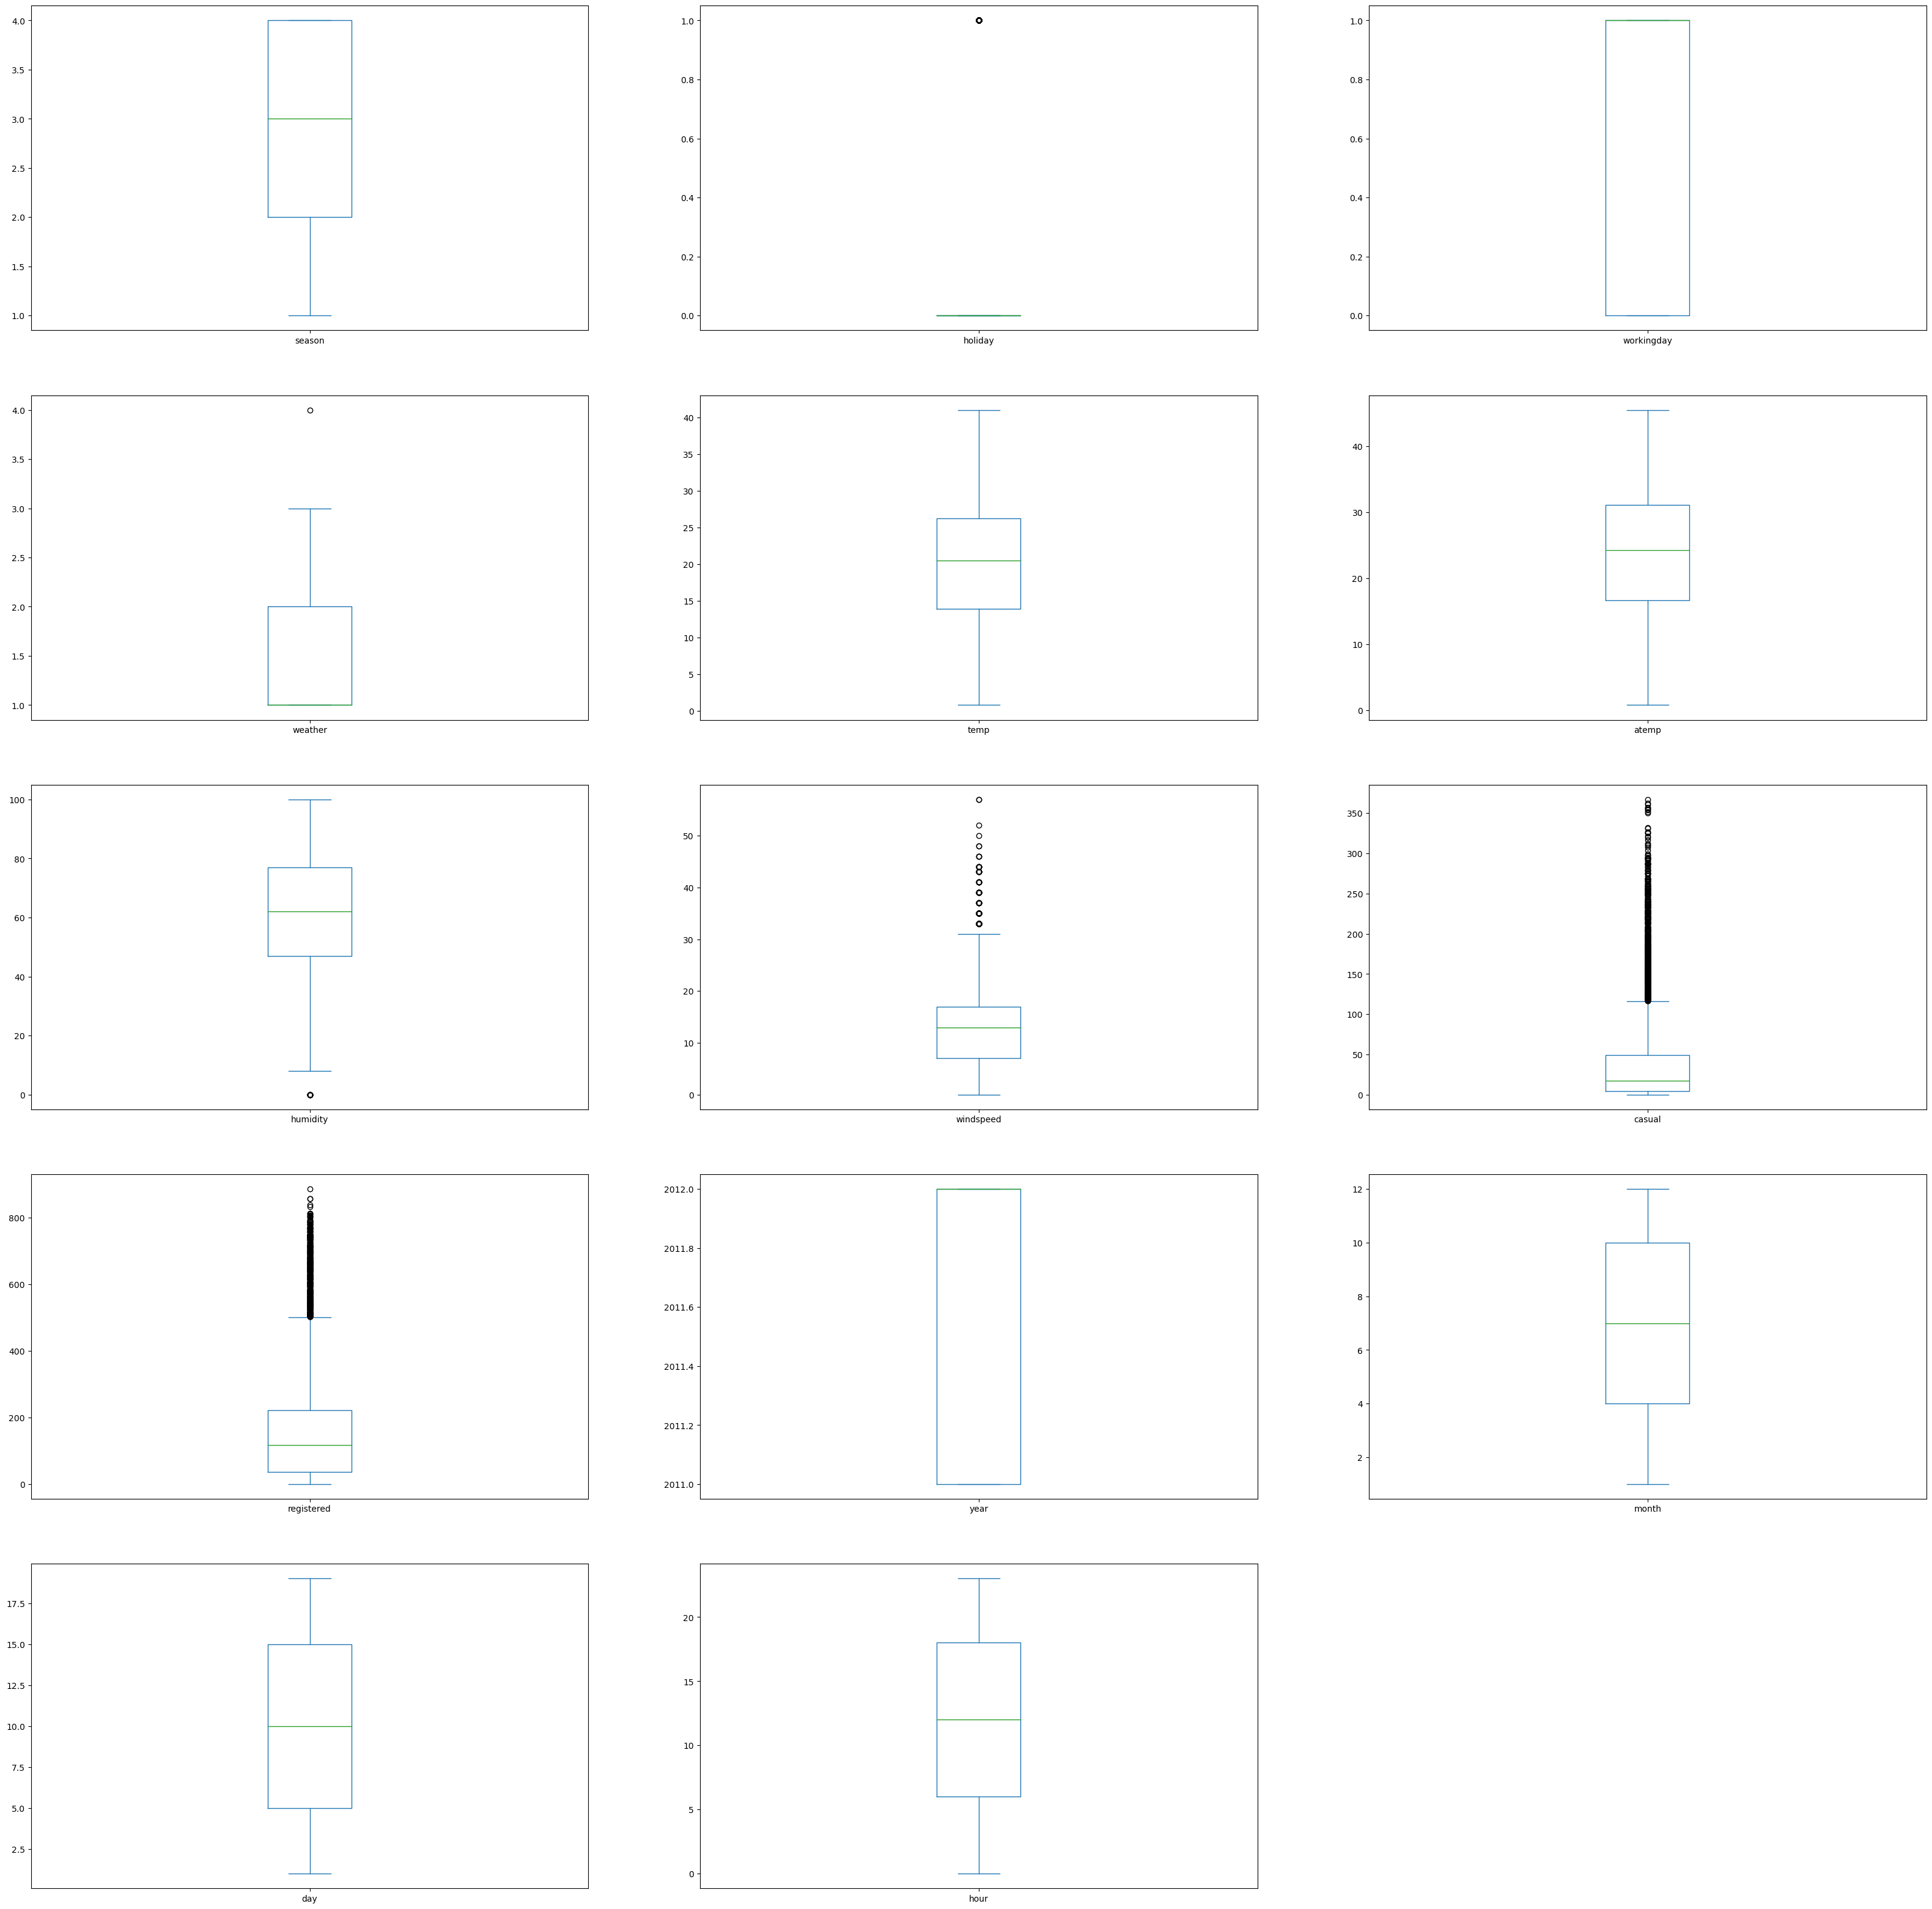

In [99]:
df.drop(columns="count").plot(
    kind = "box",
    subplots = True,
    layout = (5,3),
    figsize = (40,40),
    sharex = False,
    sharey = False
)

season           Axes(0.125,0.747241;0.227941x0.132759)
holiday       Axes(0.398529,0.747241;0.227941x0.132759)
workingday    Axes(0.672059,0.747241;0.227941x0.132759)
weather          Axes(0.125,0.587931;0.227941x0.132759)
temp          Axes(0.398529,0.587931;0.227941x0.132759)
atemp         Axes(0.672059,0.587931;0.227941x0.132759)
humidity         Axes(0.125,0.428621;0.227941x0.132759)
windspeed     Axes(0.398529,0.428621;0.227941x0.132759)
casual        Axes(0.672059,0.428621;0.227941x0.132759)
registered        Axes(0.125,0.26931;0.227941x0.132759)
year           Axes(0.398529,0.26931;0.227941x0.132759)
month          Axes(0.672059,0.26931;0.227941x0.132759)
day                  Axes(0.125,0.11;0.227941x0.132759)
hour              Axes(0.398529,0.11;0.227941x0.132759)
dtype: object

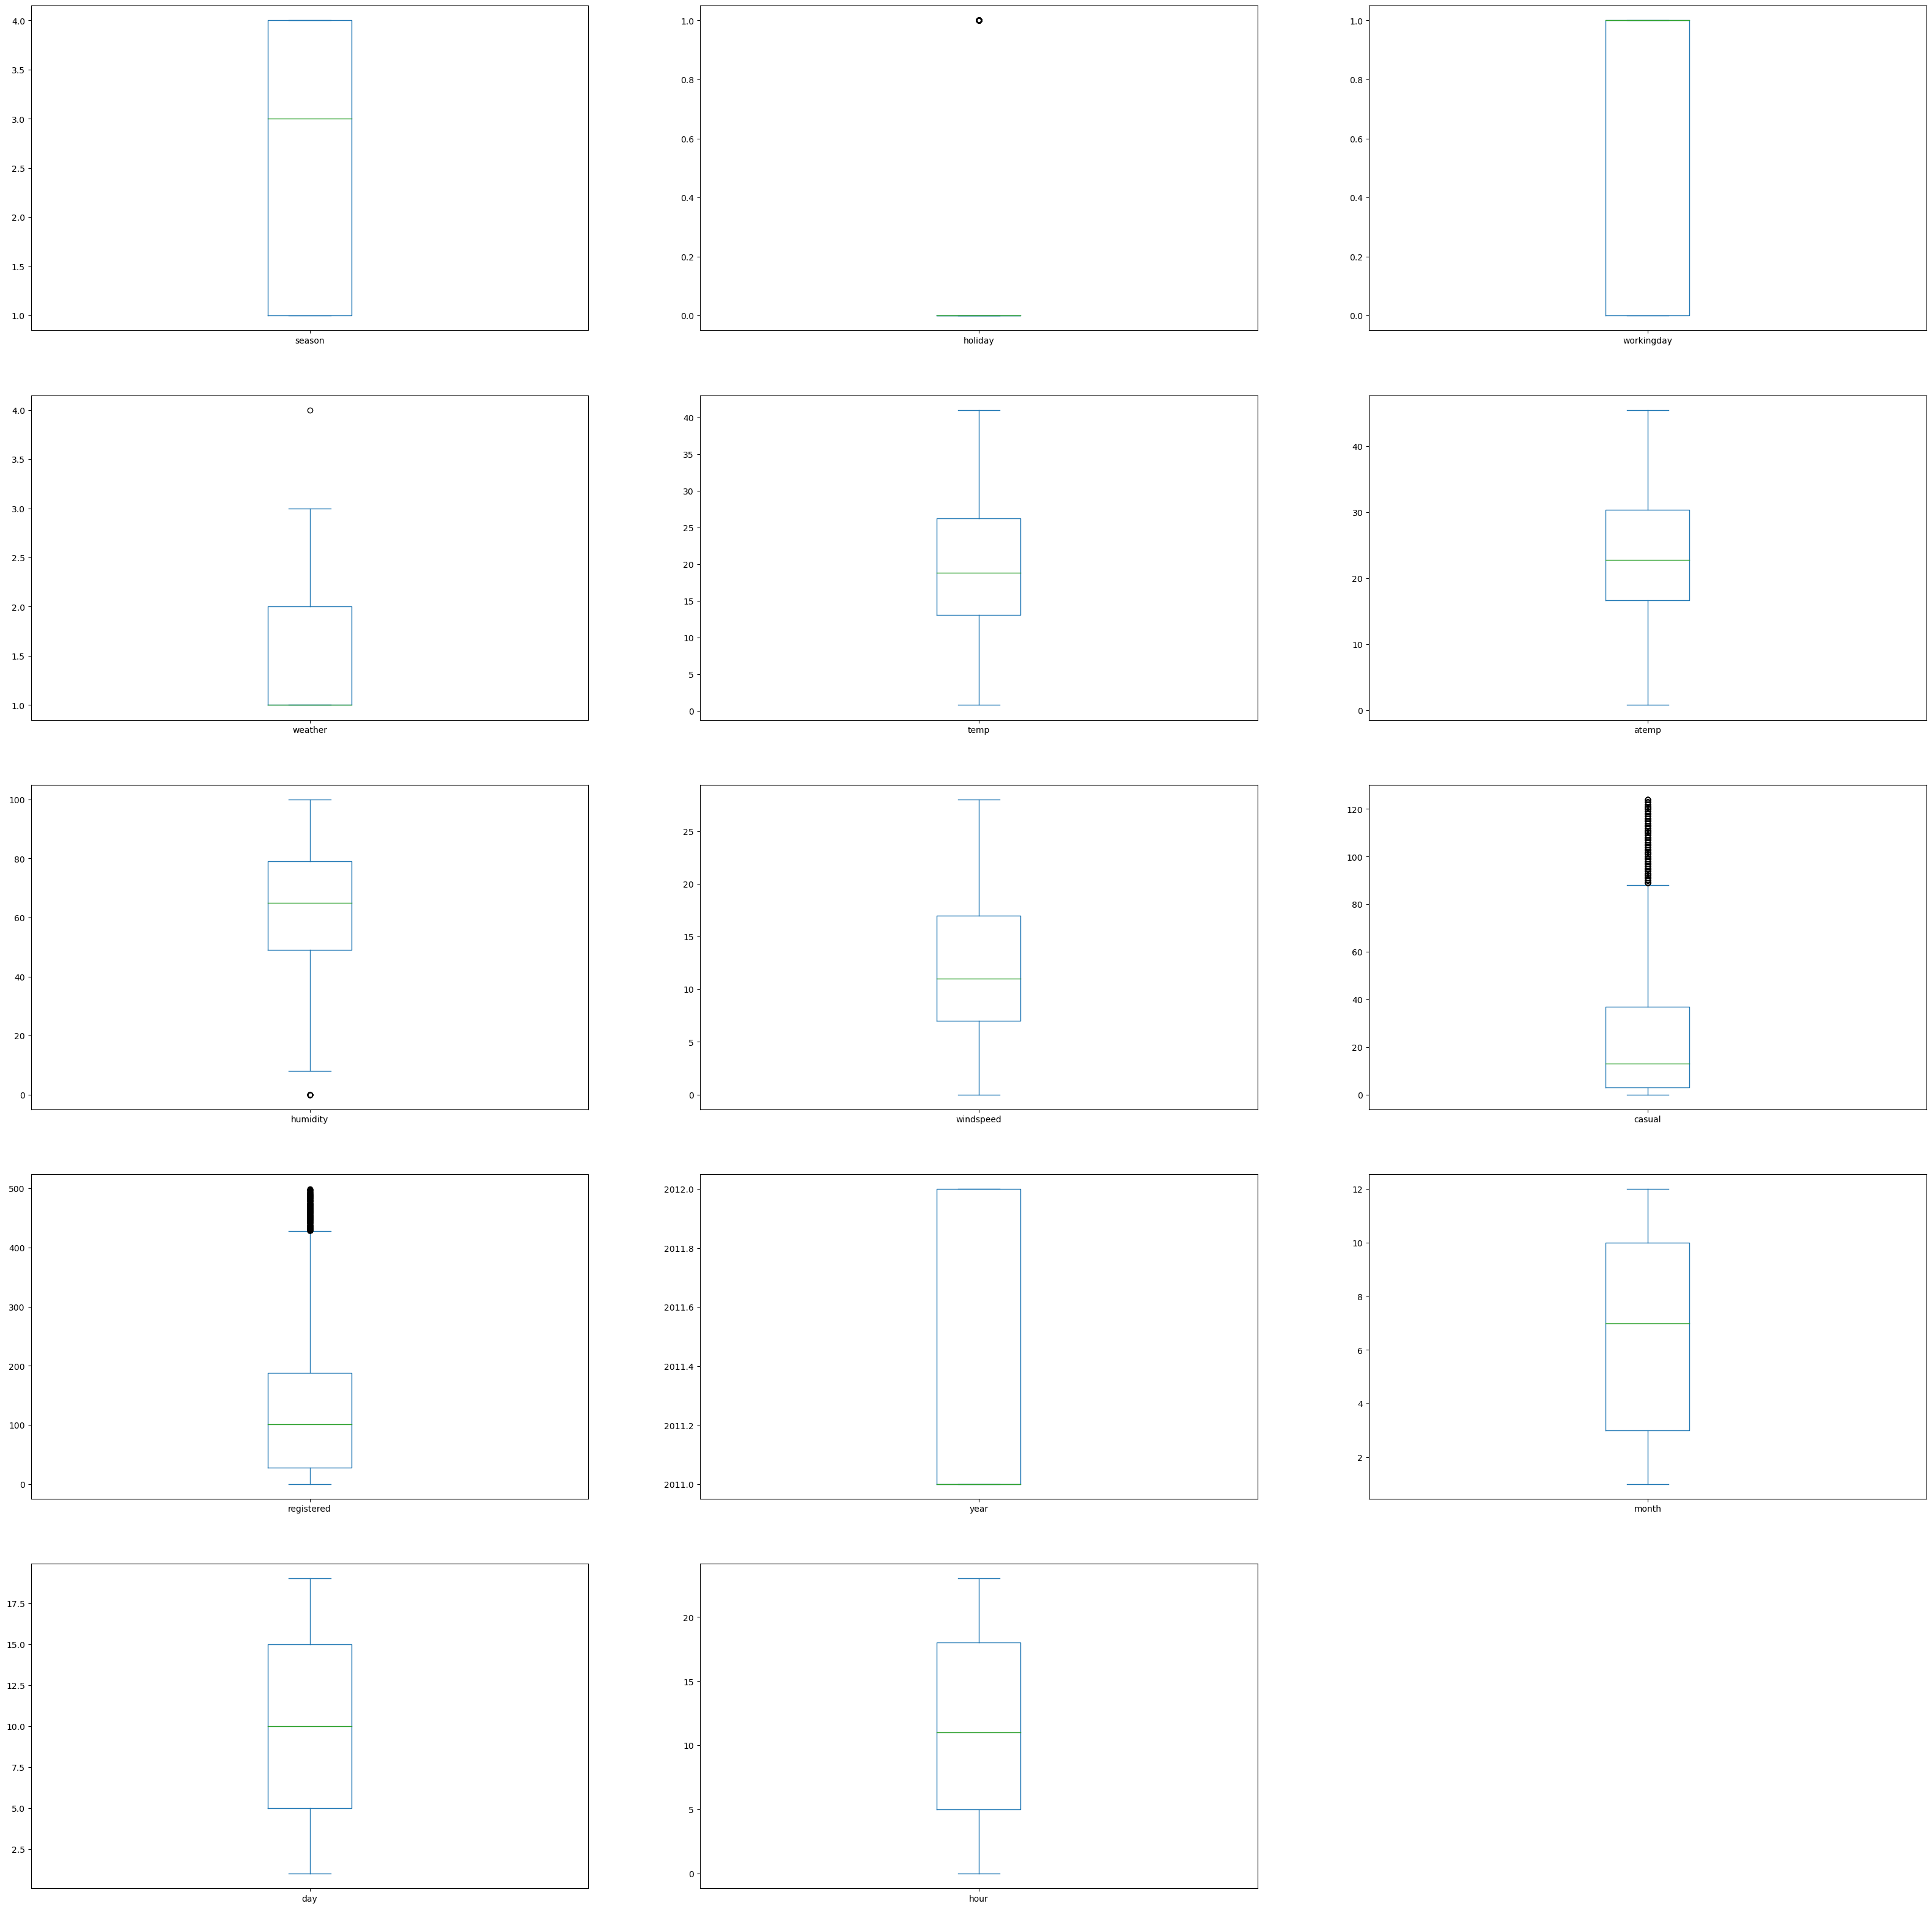

In [107]:
df.drop(columns="count").plot(
    kind = "box",
    subplots = True,
    layout = (5,3),
    figsize = (40,40),
    sharex = False,
    sharey = False
)

------------------------------------------------------------------

# 1.3 Split Data

In [112]:
target = "count"
X = df.drop(columns=target)
y = df[target]

In [115]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train train shape ", X_train.shape)
print("y_train train shape ", y_train.shape)
print("X_val train shape ", X_val.shape)
print("y_val train shape ", y_val.shape)

X_train train shape  (7540, 14)
y_train train shape  (7540,)
X_val train shape  (1886, 14)
y_val train shape  (1886,)


# Second Build Model

# 2.1 Baseline 

In [134]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean squ price:", y_mean)
print("Baseline MSE:", mean_squared_error(y_train,y_pred_baseline))

Mean squ price: 151.2446949602122
Baseline MSE: 17677.51426230748


In [154]:
acc_basline = y_train.value_counts(normalize=True).max()
acc_basline

0.01750663129973475

# 2.2 Iterate 

#                               Build     linear regression model

In [119]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

#                               Build     Ridge model

In [121]:
model2 = Ridge()
model2.fit(X_train,y_train)

Ridge()

#                               Build     Random Forest Regressor model

In [159]:
model3 = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

# 2.3 Evaluate

# Evaluate LR Model

In [160]:
y_pred_training = model1.predict(X_train)
print("Training MSE:", mean_absolute_error(y_train,y_pred_training))

Training MSE: 6.23016227467271e-13


In [161]:
y_pred_valid = model1.predict(X_val)
print("Training MSE:", mean_absolute_error(y_val,y_pred_valid))

Training MSE: 5.971342190597157e-13


# Evaluate Ridge Model

In [162]:
y_pred_training = model2.predict(X_train)
MAE2 = mean_absolute_error(y_train,y_pred_training)
print("Training MSE:", MAE2)

Training MSE: 5.006264547071371e-06


In [163]:
y_pred_valid = model2.predict(X_val)
print("Training MSE:", mean_absolute_error(y_val,y_pred_valid))

Training MSE: 5.05905467640117e-06


# Evaluate Random Forest Model

In [164]:
y_pred_training = model3.predict(X_train)
MSE = mean_squared_error(y_train,y_pred_training)
print("Training MSE:", MSE)

Training MSE: 0.5271237533156501


In [165]:
y_pred_valid = model1.predict(X_val)
print("Training MSE:", mean_squared_error(y_val,y_pred_valid))

Training MSE: 5.674024325158348e-25


# Auto ML Model

In [173]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-21.0.1+12 (build 21.0.1+12-LTS, mixed mode, sharing)
  Starting server from C:\Users\omar1\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\omar1\AppData\Local\Temp\tmpvxmb5nuc
  JVM stdout: C:\Users\omar1\AppData\Local\Temp\tmpvxmb5nuc\h2o_omar1_started_from_python.out
  JVM stderr: C:\Users\omar1\AppData\Local\Temp\tmpvxmb5nuc\h2o_omar1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_omar1_f530lv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.934 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [181]:
dft = pd.read_csv("C:\\Users\\omar1\\bike-sharing-demand\\test.csv")

In [183]:
train = h2o.H2OFrame(df)
test = h2o.H2OFrame(dft)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [184]:
x = train.columns
y = "count"
x.remove(y)

In [185]:
train , valid = train.split_frame(ratios=[0.8],seed=1)

In [186]:
valid

season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,1,2
1,0,0,1,13.12,17.425,76,0,8,6,14,2011,1,1,9
1,0,0,2,16.4,20.455,87,16.9979,11,25,36,2011,1,1,20
1,0,0,3,14.76,17.425,76,12.998,4,55,59,2011,1,2,14
1,0,0,3,13.94,16.665,71,11.0014,9,67,76,2011,1,2,16
1,0,1,1,5.74,6.82,50,12.998,1,63,64,2011,1,3,7
1,0,1,1,8.2,9.09,40,22.0028,10,41,51,2011,1,3,11
1,0,1,1,8.2,12.88,47,0,8,102,110,2011,1,3,19
1,0,1,1,8.2,11.365,47,7.0015,3,49,52,2011,1,3,20
1,0,1,1,4.92,7.575,68,7.0015,0,4,4,2011,1,4,5


In [187]:
aml = H2OAutoML(max_models = 20, seed = 1)
aml.train(x=x, y=y ,training_frame = train)

AutoML progress: |
18:48:13.47: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),11/20
# GBM base models (used / total),7/10
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),3/7
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [188]:
lb = aml.leaderboard
lb.head(rows= lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240516_184812,1.09955,1.20901,0.724497,0.0428117,1.20901
StackedEnsemble_BestOfFamily_1_AutoML_1_20240516_184812,1.11935,1.25294,0.749611,0.0626011,1.25294
GBM_grid_1_AutoML_1_20240516_184812_model_5,1.79029,3.20514,0.881069,0.0204347,3.20514
GLM_1_AutoML_1_20240516_184812,2.2333,4.98765,1.63163,0.100898,4.98765
GBM_grid_1_AutoML_1_20240516_184812_model_2,2.5992,6.75585,1.8003,0.0333614,6.75585
GBM_5_AutoML_1_20240516_184812,3.74143,13.9983,2.48662,nan,13.9983
GBM_2_AutoML_1_20240516_184812,3.80671,14.4911,2.4494,0.0554975,14.4911
GBM_1_AutoML_1_20240516_184812,4.0432,16.3474,2.6102,0.076293,16.3474
DeepLearning_1_AutoML_1_20240516_184812,4.47519,20.0274,2.9524,nan,20.0274
GBM_4_AutoML_1_20240516_184812,4.99865,24.9865,3.1594,0.059071,24.9865


In [189]:
pref = aml.leader.model_performance(valid)

In [190]:
pref

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1.143801877234371
RMSE: 1.069486735417682
MAE: 0.6884162238992205
RMSLE: 0.033473906034787934
Mean Residual Deviance: 1.143801877234371
R^2: 0.9999361919621664
Null degrees of freedom: 1871
Residual degrees of freedom: 1860
Null deviance: 33558096.002732165
Residual deviance: 2141.1971141827426
AIC: 5590.0234709692395

In [191]:
y_pred_h2o = aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [192]:
y_pred_h2o

predict
78.1348
77.8792
77.8792
78.0129
78.0129
78.013
77.9375
77.9749
78.0301
77.7729


In [195]:
with open("Auto-ml-model-bike_project","wb") as f:
    pickle.dump(aml,f)

In [196]:
with open("LR-mode-bike_project","wb") as f:
    pickle.dump(model1,f)